In [1]:
from corpora_processing import KeyPhraseExtractor
from typing import List, Union

In [2]:
from utils import ConfigLoader, Corpus, Keyword, KeywordType, Language, KeywordTranslator, CorpusFilter

In [3]:
config = ConfigLoader.get_config()

In [4]:
kwt = KeywordTranslator(cache_file=config["translator"]["cache_file"])

In [5]:
corpora: List[Corpus] = [
    Corpus(source=config["corpora"]["bundestag_corpus"], name="bundestag", language=Language.DE),
    Corpus(source=config["corpora"]["abstract_corpus"], name="abstract", language=Language.EN),
    Corpus(source=config["corpora"]["sustainability_corpus"], name="sustainability", language=Language.EN)
]

In [6]:
from simple_statistics import yearwise_documents
mult_years = []
mult_counts = []
filtered_corpora = []
for corpus in corpora:
    corpus = CorpusFilter.filter(corpus=corpus, text_contains_one_of=["fckw", "cfc"])
    filtered_corpora.append(corpus)
    import time
    print(f"{corpus.name}: {len(corpus.get_documents())} documents ({', '.join([str(y) for y in corpus.get_years()])})")
    time.sleep(1)
    
#     years, counts = yearwise_documents(corpus)
    years, counts = yearwise_documents(corpus.sample(number_documents=100))
    mult_years.append(years)
    mult_counts.append(counts)
#     simple_bar_histogram(years, counts)


Filtering 'bundestag' corpus : 100%|████████████████████████████████████████████████████| 877973/877973 [00:26<00:00, 33129.43it/s]


bundestag: 298 documents (1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2002, 2003, 2004, 2008, 2009, 2011, 2012, 2014, 2015, 2016, 2018, 2019)


Filtering 'abstract' corpus : 100%|█████████████████████████████████████████████████████| 407961/407961 [00:10<00:00, 39430.23it/s]


abstract: 905 documents (1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018)


Filtering 'sustainability' corpus : 100%|███████████████████████████████████████████████| 221034/221034 [00:05<00:00, 37561.67it/s]


sustainability: 96 documents (2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018)


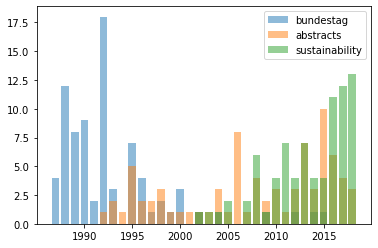

In [7]:
mult_counts = []
mult_years = []
for corpus in filtered_corpora:
#     years, counts = yearwise_documents(corpus)
    years, counts = yearwise_documents(corpus.sample(number_documents=80))
    mult_years.append(years)
    mult_counts.append(counts)
#     simple_bar_histogram(years, counts)
from plot_utils import multi_bar_histogram
multi_bar_histogram(mult_years, mult_counts, labels=["bundestag", "abstracts", "sustainability"], normalize=False, corpus_lengths=[877973, 407961, 221034])

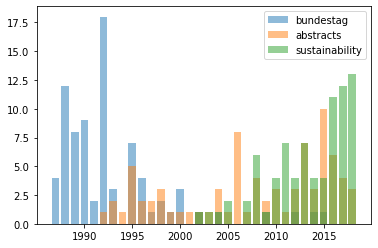

In [8]:
from plot_utils import multi_bar_histogram
multi_bar_histogram(mult_years, mult_counts, labels=["bundestag", "abstracts", "sustainability"], normalize=False, corpus_lengths=[877973, 407961, 221034])

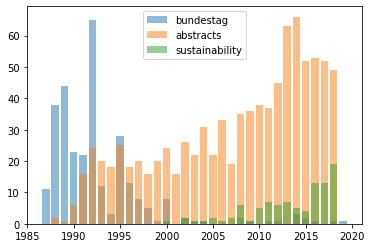

In [15]:
from plot_utils import multi_bar_histogram
multi_bar_histogram(mult_years, mult_counts, labels=["bundestag", "abstracts", "sustainability"], normalize=False, corpus_lengths=[877973, 407961, 221034])

In [9]:
# extract keywords from documents in corpus and assign keywords to documents
sampled_corpora = [corpus.sample(10) for corpus in filtered_corpora]
for corpus in sampled_corpora:
    KeyPhraseExtractor.rake(corpus=corpus.sample(10))

Assign keywords to documents: 100%|█████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19982.39it/s]


In [13]:
for corpus in sampled_corpora[:]:
    corpus.translate_keywords(restrict_per_document=10)

sampled_corpora[2].get_documents()[0].keywords

de 	 almost forcing the only energy source 			 nahezu einzig energieträger zwingen
found keyword in cache, taking this one
de 	 extremely long period expire 			 extrem lang zeitraum ablaufen
found keyword in cache, taking this one
de 	 a total of 750 million dm 			 insgesamt 750 million dm
de 	 250 million annually dm 			 250 million dm jährlich
de 	 millions of years grown species wealth unimaginable 			 jahrmillionen gewachsen unvorstellbar artenreichtums
de 	 previously reached unimaginable dynamics 			 bisher unvorstellbar dynamik erreichen
de 	 existentially not living human 			 existentiell not lebend mensch
de 	 nearly three decade double 			 knapp drei jahrzehnt verdoppeln
de 	 can act clearly 			 verhalten deutlich erkennen lassen
de 	 genetic evolution unersätzlichen ecosystem 			 genetisch evolution unersätzlichen ökosystem
de 	 passed 200 million year 			 vergangen 200 million jahr
found keyword in cache, taking this one
de 	 suggest environmental issues in 1990 			 umweltf

de 	 keep environmental impairment as small as possible 			 umweltbeeinträchtigung möglichst klein halten
de 	 mr colleague shepherd 			 lieber herr kollege schäfer
de 	 actually palpable 			 ja eigentlich deutlich spürbar
found keyword in cache, taking this one
en 	 climate change induce 			 Klimawandel induzieren
found keyword in cache, taking this one
en 	 face risk induce 			 Gesicht Risiko induzieren
found keyword in cache, taking this one
en 	 market regard uncertainty 			 Markt hinsichtlich Unsicherheit
en 	 environmental risk 			 Umweltrisiken
en 	 co2 emission 			 CO2-Emission
en 	 classic formulation 			 klassische Formulierung
en 	 market 			 Markt
en 	 formulation 			 Formulierung
en 	 originate 			 entstehen
en 	 nature 			 Natur
en 	 extend 			 erweitern
found keyword in cache, taking this one
en 	 high temperature exhaust gas 			 Hochtemperatur-Abgas
found keyword in cache, taking this one
en 	 many tightly integrate sub 			 viele enge Integration Unter
found keyword in 

en 	 alleviate co2 emission 			 lindern CO2
en 	 cloud knowledge base 			 Cloud Wissensbasis
en 	 increase carbon footprint 			 Erhöhung Kohlenstoff-Fußabdruck
found keyword in cache, taking this one
en 	 write mainly base 			 schreibt in erster Linie Basis
found keyword in cache, taking this one
en 	 much recent literature 			 viel neuere Literatur
found keyword in cache, taking this one
en 	 examine different type 			 untersuchen unterschiedliche Art
en 	 much sustainable consumption 			 viel nachhaltiger Konsum
en 	 future empirical study 			 Zukunft empirische Studie
en 	 assign practical example 			 assign praktisches Beispiel
en 	 future empirical research 			 Zukunft empirische Forschung
en 	 collaborative fashion consumption 			 kollaborative Mode Verbrauch
en 	 ﻿ 1 paper 			 1 Papier
en 	 transfer exist structure 			 Übertragungsstruktur exist
en 	 solid conceptual basis 			 solide konzeptionelle Grundlage
found keyword in cache, taking this one
en 	 solve air quality problem 

[(reduce greenhouse gas emission | Treibhausgasemissionen reduzieren),
 (household carbon dioxide emission | Haushaltskohlendioxidemission),
 (estimate carbon emission cause | Schätzung Kohlenstoff-Emission bewirken),
 (much fuel efficient route | viel Kraftstoff sparende Route),
 (carbon footprint calculator available | Carbon Footprint-Rechner verfügbar),
 (personal carbon footprint base | persönliche Kohlenstoff-Fußabdruck Basis),
 (carbon footprint calculation framework | Kohlenstoff-Fußabdruck Berechnungsrahmen),
 (calculator use quantitative model | Rechner verwendet quantitatives Modell),
 (alleviate co2 emission | lindern CO2),
 (cloud knowledge base | Cloud Wissensbasis),
 (increase carbon footprint | Erhöhung Kohlenstoff-Fußabdruck),
 time sensor datum,
 input datum manually,
 calculation little accurate,
 exist co2 calculator,
 important global issue,
 give developer access,
 poor user experience,
 individual human level,
 footprint calculator,
 ucfc application incorporate,

In [15]:
sampled_corpora[2].get_documents()[1].keywords

[(write mainly base | schreibt in erster Linie Basis),
 (much recent literature | viel neuere Literatur),
 (examine different type | untersuchen unterschiedliche Art),
 (much sustainable consumption | viel nachhaltiger Konsum),
 (future empirical study | Zukunft empirische Studie),
 (assign practical example | assign praktisches Beispiel),
 (future empirical research | Zukunft empirische Forschung),
 (collaborative fashion consumption | kollaborative Mode Verbrauch),
 (﻿ 1 paper | 1 Papier),
 (transfer exist structure | Übertragungsstruktur exist),
 (solid conceptual basis | solide konzeptionelle Grundlage),
 possible environmental effect,
 propose cfc typology,
 collaborative consumption,
 environmental effect,
 conceptual basis,
 future development,
 research limitation,
 unique contribution,
 specific field,
 practical implication,
 paper make,
 old paper,
 main contribution,
 inductive process,
 explicitly dedicate,
 efficient service,
 cfc typology,
 finding provide,
 develope use

In [30]:
kwt = KeywordTranslator()
for corpus in sampled_corpora:
    for d in corpus.get_documents():
        print(d.text[:100], '...\n  keywords:')
        for kw in d.keywords:
            print('    - \"'+str(kw)+'\"')
        print('\n')

Dann rufe ich Frage 26 der Kollege Erler auf : welch Maßnahme haben der Bundesregierung ergreifen be ...
  keywords:
    - "deutsch rüstungsindustrie einschränken)"
    - "bundesregierung ergreifen beziehungsweise)"
    - "welch maßnahme)"
    - "kollege erler)"
    - "frage 26)"
    - "ergreifen)"
    - "stoff)"
    - "rufe)"
    - "gänzlich)"
    - "fckw)"
    - "ersetzen)"
    - "einsatz)"
    - "bundeswehr)"
    - "bitte)"


Herr Präsident ! Meine sehr verehren Dame und Herr ! Bei der Bewertung der Umweltrelevanz der FCKW g ...
  keywords:
    - "abgeordnete müller gekennzeichnet fortentwicklung)"
    - "26 000 tonne immerhin)"
    - "bundesrepublik deutschland politik betreiben)"
    - "bundesrepublik deutschland heraus verwirklichen)"
    - "ta luft entsprechen ändern)"
    - "gerade beim klimaeffekt erkennen)"
    - "international multiplikative wirkung auslösen)"
    - "darauf aufbauen weit anstreben)"
    - "3 000 tonne fckw)"
    - "problematisch stoff hinterherjagen muß)"
  

In [ ]:
from typing import Dict, List
from collections import Counter

In [ ]:
def key_word_count(keywords: Dict[str, List[str]], top_k=100):
    flattened_keywords = [word for document, document_keywords in keywords.items() for word in document_keywords]
    c = Counter(flattened_keywords)
    if top_k is None:
        return c
    return c.most_common(top_k)

In [ ]:
print(key_word_count(rake_keywords))